# import libraries

In [5]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
data = fetch_california_housing(as_frame=True)
df= pd.DataFrame(data.frame)
#df1 = pd.DataFrame(data)
print(df)
price = data.target

# X = features, y = target
x_train, x_test, y_train, y_test = train_test_split(df, price, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_scaled_train  = scaler.fit_transform(x_train)
x_scaled_test = scaler.transform(x_test)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

# train model and evaluate model

In [7]:
model = LinearRegression()
model.fit(x_scaled_train,y_train)
y_pred = model.predict(x_scaled_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)
print(x_scaled_test.shape)
test1 = [[-0.35138613,  1.85613656 , 0.01964786, -0.0360261 , -0.45518233, -0.07769784,
  1.03847753, -1.34277661 , 0.64685458]]
t = np.array(test1)
print(t.shape)
print(model.predict(t))

5.837850667637674e-30
(4128, 9)
(1, 9)
[2.81983454]


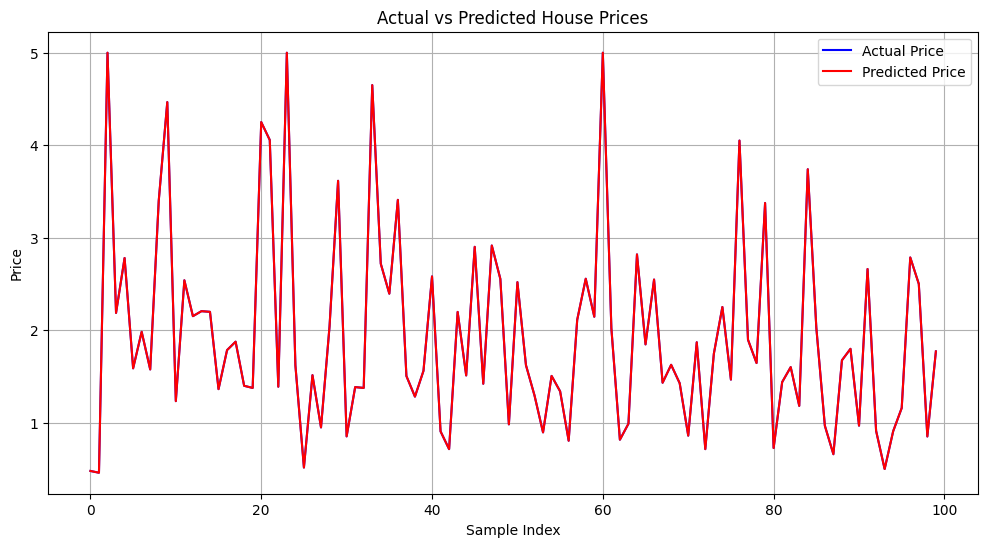

In [9]:
import matplotlib.pyplot as plt

# Reset index to align predictions with actual values
y_test_reset = y_test.reset_index(drop=True)
y_pred_series = pd.Series(y_pred)

# Plot actual vs predicted price for first 100 samples
plt.figure(figsize=(12, 6))
plt.plot(y_test_reset[:100], label='Actual Price', color='blue')
plt.plot(y_pred_series[:100], label='Predicted Price', color='red')
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
